In [2]:
! ls /Users/guillermogonzalez/ga/evan_github/input/

mapdata_copyright_openstreetmap_contributors.rds
mapdata_copyright_openstreetmap_contributors.txt
noaa_weather_qclcd_documentation.pdf
sampleSubmission.csv
spray.csv
test.csv
train.csv
weather.csv


In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.feature_selection import RFE
import seaborn as sns

from sklearn.metrics import roc_auc_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve

### Train Data EDA

In [202]:
df_train = pd.read_csv('/Users/guillermogonzalez/ga/evan_github/input/train.csv')

In [203]:
columns = df_train.columns
for col in columns:
    print(col)
    print(df_train[col].value_counts().sort_values(ascending=False))

Date
2007-08-01    551
2007-08-15    276
2007-08-21    186
2013-08-01    186
2007-08-24    186
2007-10-04    185
2007-08-07    184
2013-07-12    182
2013-07-19    182
2013-08-08    181
2011-07-25    179
2011-07-15    177
2013-08-22    167
2007-09-24    167
2009-07-17    164
2013-08-15    157
2013-07-25    153
2007-07-11    152
2011-07-11    146
2013-08-29    143
2013-09-06    143
2011-08-05    140
2013-09-12    139
2009-07-31    139
2007-08-22    139
2011-07-29    138
2011-09-12    138
2007-08-02    137
2007-09-12    135
2009-08-07    131
             ... 
2009-07-27     83
2013-06-07     77
2009-06-05     77
2007-07-02     74
2009-07-13     71
2007-06-26     70
2009-10-01     65
2011-06-10     62
2013-06-27     62
2011-09-01     62
2011-09-30     61
2013-06-28     60
2007-06-05     60
2009-05-28     59
2009-09-03     55
2009-08-27     54
2007-08-17     54
2009-06-22     52
2011-09-02     50
2007-09-06     50
2007-06-29     46
2007-07-19     45
2009-06-15     32
2009-06-29     31
2007-

In [204]:
df_train['Date'].nunique()

95

In [205]:
df_train.nunique()

Date                       95
Address                   138
Species                     7
Block                      64
Street                    128
Trap                      136
AddressNumberAndStreet    138
Latitude                  138
Longitude                 138
AddressAccuracy             4
NumMosquitos               50
WnvPresent                  2
dtype: int64

In [206]:
train = df_train.drop(labels=['Address','Block','Street',
                            'AddressNumberAndStreet',
                           'AddressAccuracy'],axis=1)

In [207]:
train['Date'] = pd.to_datetime(train['Date']) # convert dtype to date

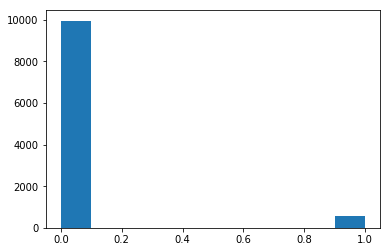

In [210]:
plt.hist(x=train['WnvPresent'])
plt.show()

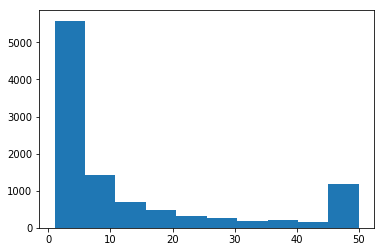

In [211]:
plt.hist(x=train['NumMosquitos'])
plt.show()

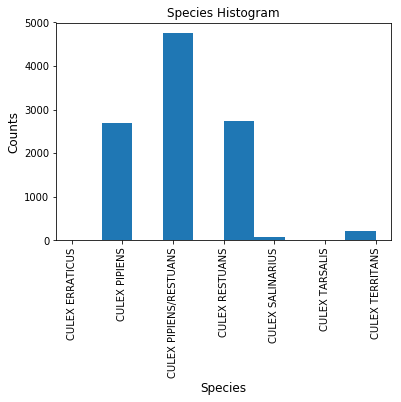

In [212]:
plt.hist(x=train['Species'].sort_values(), orientation='vertical',)
plt.xticks(x=train['Species'], rotation='vertical')
plt.title('Species Histogram')
plt.xlabel('Species',size='large')
plt.ylabel('Counts',size='large')
plt.show()

####  Merge Weather Data into Train and create a csv

In [213]:
train_merge = train.merge(weather_new, how = 'left', on = 'Date')

In [214]:
train_merge.to_csv(path_or_buf='./train_with_weather.csvx')

In [685]:
train_merge['WnvPresent'].value_counts().sum()

10506

### Test Data EDA

In [216]:
df_test = pd.read_csv('/Users/guillermogonzalez/ga/evan_github/input/test.csv')

In [217]:
# columns_test = df_test.columns

# for col in columns_test:
#     print(col)
#     print(df_test[col].value_counts())

In [218]:
df_test[ df_test['Trap']=='T094B' ]

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
1192,1193,2008-06-11,"9600 South Longwood Drive, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,96,S LONGWOOD DR,T094B,"9600 S LONGWOOD DR, Chicago, IL",41.71914,-87.669539,9
1193,1194,2008-06-11,"9600 South Longwood Drive, Chicago, IL 60643, USA",CULEX RESTUANS,96,S LONGWOOD DR,T094B,"9600 S LONGWOOD DR, Chicago, IL",41.71914,-87.669539,9
1194,1195,2008-06-11,"9600 South Longwood Drive, Chicago, IL 60643, USA",CULEX PIPIENS,96,S LONGWOOD DR,T094B,"9600 S LONGWOOD DR, Chicago, IL",41.71914,-87.669539,9
1195,1196,2008-06-11,"9600 South Longwood Drive, Chicago, IL 60643, USA",CULEX SALINARIUS,96,S LONGWOOD DR,T094B,"9600 S LONGWOOD DR, Chicago, IL",41.71914,-87.669539,9
1196,1197,2008-06-11,"9600 South Longwood Drive, Chicago, IL 60643, USA",CULEX TERRITANS,96,S LONGWOOD DR,T094B,"9600 S LONGWOOD DR, Chicago, IL",41.71914,-87.669539,9
1197,1198,2008-06-11,"9600 South Longwood Drive, Chicago, IL 60643, USA",CULEX TARSALIS,96,S LONGWOOD DR,T094B,"9600 S LONGWOOD DR, Chicago, IL",41.71914,-87.669539,9
1198,1199,2008-06-11,"9600 South Longwood Drive, Chicago, IL 60643, USA",UNSPECIFIED CULEX,96,S LONGWOOD DR,T094B,"9600 S LONGWOOD DR, Chicago, IL",41.71914,-87.669539,9
1199,1200,2008-06-11,"9600 South Longwood Drive, Chicago, IL 60643, USA",CULEX ERRATICUS,96,S LONGWOOD DR,T094B,"9600 S LONGWOOD DR, Chicago, IL",41.71914,-87.669539,9
2400,2401,2008-06-17,"9600 South Longwood Drive, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,96,S LONGWOOD DR,T094B,"9600 S LONGWOOD DR, Chicago, IL",41.71914,-87.669539,9
2401,2402,2008-06-17,"9600 South Longwood Drive, Chicago, IL 60643, USA",CULEX RESTUANS,96,S LONGWOOD DR,T094B,"9600 S LONGWOOD DR, Chicago, IL",41.71914,-87.669539,9


In [219]:
df_test['Trap'].nunique()

149

In [220]:
df_test['Date'].nunique()

95

In [221]:
df_test['Id'].nunique()

116293

In [222]:
test = df_test.drop(labels=['Address','Block','Street',
                            'AddressNumberAndStreet',
                           'AddressAccuracy'],axis=1)

In [223]:
test['Date'] = pd.to_datetime(test['Date']) # convert date dtype to date

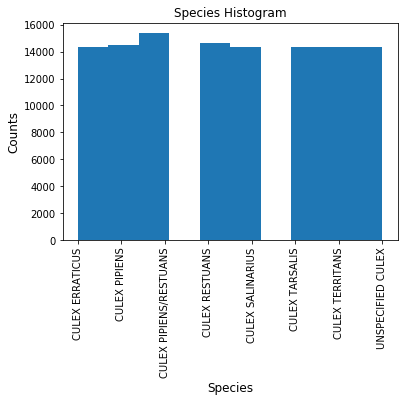

In [224]:
plt.hist(x=test['Species'].sort_values(),orientation='vertical')
plt.xticks(x=test['Species'], rotation='vertical')
plt.title('Species Histogram')
plt.xlabel('Species',size='large')
plt.ylabel('Counts',size='large')
plt.show()

#### Merge Test with Weather data and create a csv

In [225]:
test_merge = test.merge(weather_new, how = 'left', on = 'Date')

In [226]:
test_merge.to_csv(path_or_buf = './test_with_weather.csvx')

### Weather data EDA

In [166]:
df_weather = pd.read_csv('/Users/guillermogonzalez/ga/evan_github/input/weather.csv')

In [167]:
columns_w = df_weather.columns
for col in columns_w:
    print(col)
    print(df_weather[col].value_counts())

Station
1    1472
2    1472
Name: Station, dtype: int64
Date
2007-10-31    2
2014-10-02    2
2013-05-25    2
2012-05-01    2
2012-05-24    2
2012-05-03    2
2011-08-30    2
2007-09-12    2
2014-05-03    2
2011-07-07    2
2012-07-25    2
2014-10-27    2
2009-07-01    2
2008-05-06    2
2010-05-21    2
2007-07-25    2
2012-09-03    2
2010-10-15    2
2010-10-31    2
2009-06-04    2
2009-10-26    2
2007-10-15    2
2007-10-30    2
2011-08-07    2
2014-10-04    2
2014-08-26    2
2014-06-13    2
2012-07-31    2
2011-05-06    2
2014-07-02    2
             ..
2007-06-18    2
2010-05-06    2
2012-06-28    2
2008-07-06    2
2008-06-22    2
2009-05-13    2
2007-10-16    2
2014-08-29    2
2007-10-22    2
2008-08-26    2
2014-09-18    2
2012-10-04    2
2014-09-21    2
2008-08-28    2
2008-05-30    2
2013-07-27    2
2013-09-05    2
2012-08-14    2
2013-10-01    2
2013-08-06    2
2012-06-30    2
2009-05-12    2
2012-09-22    2
2012-09-27    2
2011-05-30    2
2014-10-07    2
2012-08-01    2
2011-05-20 

In [594]:
df_weather

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [169]:
weather = df_weather.drop(['Sunrise', 'Sunset',
                           'CodeSum', 'Depth','Water1','SnowFall'
                          ],axis=1)

In [170]:
weather['Station'].value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [171]:
# convert date dtype to date
weather['Date'] = pd.to_datetime(weather['Date']) # convert date dtype to date

In [172]:
# PrecipTotal:  replace M values from station 2 with same value as station 1's
weather.loc[117,'PrecipTotal'] = weather.loc[116, 'PrecipTotal']
weather.loc[119,'PrecipTotal'] = weather.loc[118, 'PrecipTotal']

#PrecipTotal:  replace T values with zero
weather['PrecipTotal'] = weather['PrecipTotal'].str.strip().replace('T','0')

In [173]:
# Tavg:  remove M values (11 all station 2) from data
Tavg_m_drop = weather[ weather['Tavg']=='M' ].index.tolist()
weather.drop(weather.index[[Tavg_m_drop]],axis=0,inplace=True)

In [174]:
# WetBulb:  replace M with values from corresponding station 1
weather.loc[848,'WetBulb'] = weather.loc[849,'WetBulb']
weather.loc[2410,'WetBulb'] = weather.loc[2411,'WetBulb']
weather.loc[2412,'WetBulb'] = weather.loc[2413,'WetBulb']
weather.loc[2415,'WetBulb'] = weather.loc[2414,'WetBulb']

In [175]:
# SeaLevel:  removing M's since there is a corresponding 
SeaLevel_Ms = weather[ weather['SeaLevel']=='M' ].index.tolist()
weather.drop(weather.index[SeaLevel_Ms], axis=0,inplace=True)

In [176]:
# StnPressure: 2 M's are station 2 values so changed to station 1 info.  2 other M's drop station 1 and station 2
weather.loc[87, 'StnPressure'] = weather.loc[86, 'StnPressure']
weather.loc[848, 'StnPressure'] = weather.loc[849, 'StnPressure']
weather.drop(index=[2410, 2411], inplace=True)

In [177]:
print(weather.loc[86:89, 'StnPressure'])
print(weather.loc[848:849, 'StnPressure'])

86    29.36
87    29.36
89    29.36
Name: StnPressure, dtype: object
848    29.20
849    29.20
Name: StnPressure, dtype: object


In [178]:
# SeaLevel:  removing M's since there is a corresponding 
SeaLevel_Ms = weather[ weather['SeaLevel']=='M' ].index.tolist()
weather.drop(index=SeaLevel_Ms, axis=0, inplace=True)

In [179]:
# Removing rows that have M or NaN in them
AvgSpeed_Ms = weather[ (weather['AvgSpeed']=='M') | (weather['AvgSpeed'].isna()) ].index.tolist()
weather.drop(index=AvgSpeed_Ms, axis=0, inplace=True)

In [180]:
weather[weather['AvgSpeed']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


In [181]:
# Depart and SnowFall both have 1472 M's they are all station 2
depart_drop_indices = weather[ (weather['Depart']=='M') |(weather['Depart'].isna()) ].index.tolist()
weather.drop(index=depart_drop_indices, axis=0, inplace=True)

In [182]:
# List of header that I want to convert to floats and integers
flts = ['PrecipTotal', 'ResultSpeed', 'AvgSpeed','StnPressure', 'SeaLevel']
ints = ['Tavg', 'WetBulb','Heat','Cool','ResultDir','Depart']

In [183]:
# Convert objects to integers
weather[ints] = weather[ints].astype('int')

In [184]:
# Convert objects to floats
weather[flts] = weather[flts].astype('float')

In [185]:
# Farenheit to Celcius for RH calculation
weather[['Tavg(C)','DewPoint(C)']]=weather[['Tavg','DewPoint']].apply(lambda x: (x-32)*(5/9)).round(1)

In [186]:
#Calculation Relative Humidity
weather['RH'] = (100*(1.8096 * np.exp(17.2694*weather['DewPoint(C)']/(237.3 + weather['DewPoint(C)'])))/
                 (1.8096 * np.exp((17.2694*weather['Tavg(C)']/(237.3 + weather['Tavg(C)']))))).round(1)

In [190]:
columns_groupby = weather.columns.tolist()[2:16]
columns_groupby.append(weather.columns.tolist()[18])

In [192]:
# weather_new is the new dataframe with station 1 and 2 data combined
weather_new = weather.groupby('Date')[columns_groupby].mean().reset_index(level=0)

In [193]:
# Shape of weather _new is larger than the shape of station 
weather_new.shape

(1463, 16)

In [194]:
weather_new.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,RH
0,2007-05-01,83,50,67,14,51,56,0,2,0.0,29.10,29.82,1.7,27,9.2,56.7
1,2007-05-02,59,42,51,-3,42,47,14,0,0.0,29.38,30.09,13.0,4,13.4,71.2
2,2007-05-03,66,46,56,2,40,48,9,0,0.0,29.39,30.12,11.7,7,11.9,54.8
3,2007-05-04,66,49,58,4,41,50,7,0,0.0,29.31,30.05,10.4,8,10.8,53.2
4,2007-05-05,66,53,60,5,38,49,5,0,0.0,29.40,30.10,11.7,7,12.0,43.7


In [195]:
# .csv file called .csvx since gitignore excludes .csv files
weather_new.to_csv(path_or_buf = './weather_new.csvx')

In [201]:
!ls

TRAIN                   output.html             weather_new.csvx
WN_Data_EDA.txt         test_with_weather.csvx
WestNile.ipynb          train_with_weather.csvx


In [59]:
def count_Ms_Ts(df):
    print('{0:13s} {1:>5s} {2:>5s} {3:>8s} {4:>8s}'.format('column', 'Ms', 'Ts', 'Others', 'Total'))
    for col in df.columns:
        cnt_M = 0
        cnt_T = 0
        cnt_O = 0
        for i, row in df.iterrows():
            if row[col] == 'M':
                cnt_M += 1
###                print('(M) index=',i)
            elif row[col] == '  T':
                cnt_T += 1
###                print('(T) index=',i)
            else:
                if col != 'Date':
                    cnt_O += 1
                    try:
                        float(row[col])
                    except ValueError:
                        print('ERROR:', i, row['Station'], row[col])
        print('{0:13s} {1:5.0f} {2:5.0f} {3:8.0f} {4:8.0f}'.format(col, cnt_M, cnt_T, cnt_O, cnt_M+cnt_T+cnt_O))

In [60]:
count_Ms_Ts(weather_new)

column           Ms    Ts   Others    Total
Date              0     0        0        0
Tmax              0     0     1463     1463
Tmin              0     0     1463     1463
Tavg              0     0     1463     1463
Depart            0     0     1463     1463
DewPoint          0     0     1463     1463
WetBulb           0     0     1463     1463
Heat              0     0     1463     1463
Cool              0     0     1463     1463
PrecipTotal       0     0     1463     1463
StnPressure       0     0     1463     1463
SeaLevel          0     0     1463     1463
ResultSpeed       0     0     1463     1463
ResultDir         0     0     1463     1463
RH                0     0     1463     1463


### Spray Data EDA

In [228]:
df_spray = pd.read_csv('/Users/guillermogonzalez/ga/evan_github/input/spray.csv')

In [229]:
df_spray.nunique()

Date            10
Time          8583
Latitude     12887
Longitude    13007
dtype: int64

In [230]:
columns_spray = df_spray.columns
for col in columns_spray:
    print(col)
    print(df_spray[col].value_counts())

Date
2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64
Time
7:44:32 PM     541
9:35:47 PM       5
9:05:56 PM       5
8:57:46 PM       5
8:59:06 PM       5
9:31:27 PM       5
8:58:56 PM       5
9:38:27 PM       5
8:58:26 PM       5
9:40:27 PM       5
8:57:56 PM       5
9:37:27 PM       5
8:55:36 PM       5
8:55:46 PM       5
8:55:26 PM       5
8:59:45 PM       4
9:25:46 PM       4
8:29:46 PM       4
8:49:15 PM       4
8:38:35 PM       4
9:48:55 PM       4
8:48:25 PM       4
9:02:56 PM       4
9:07:25 PM       4
9:35:57 PM       4
9:31:17 PM       4
8:26:01 PM       4
9:16:15 PM       4
9:18:55 PM       4
10:01:35 PM      4
              ... 
7:49:00 PM       1
11:31:38 PM      1
8:13:49 PM       1
10:38:56 PM      1
9:42:58 PM       1
8:49:22 PM       1
10:25:57 PM      1
7:45:03 PM       1
9:45:06 PM       1
9:33:19 PM     

In [232]:
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [76]:
spray = df_spray.copy()

In [104]:
# Converting date and makeing columns for year and month
spray['Date'] = pd.to_datetime(spray['Date'])
spray['Year'] = spray['Date'].dt.year
spray['Month'] = spray['Date'].dt.month

#### 'Time'
- There are 584 null values in 2011-09-07.  Time appears to be captured every 10 seconds. NaN values are between 7:44:32 to 7:46:30

In [160]:
print(spray[ (spray['Year']==2011) & (spray['Month']==9)].min())
print(spray[ (spray['Year']==2011) & (spray['Month']==9)].max())

Date         2011-09-07 00:00:00
Latitude                 41.9684
Longitude               -87.8366
Year                        2011
Month                          9
dtype: object
Date         2011-09-07 00:00:00
Latitude                  41.997
Longitude               -87.7877
Year                        2011
Month                          9
dtype: object


In [125]:
spray[['Date','Time']][1600:1618]

,Date,Time
1600,2011-09-07,NaN
1601,2011-09-07,NaN
1602,2011-09-07,NaN
1603,2011-09-07,NaN
1604,2011-09-07,NaN
1605,2011-09-07,NaN
1606,2011-09-07,NaN
1607,2011-09-07,NaN
1608,2011-09-07,NaN
1609,2011-09-07,NaN


### Sample Submission data EDA

In [78]:
df_sample = pd.read_csv('/Users/guillermogonzalez/ga/evan_github/input/sampleSubmission.csv')

In [79]:
df_sample.nunique()

Id            116293
WnvPresent         1
dtype: int64

### Date Ranges

In [625]:
date_dict = {'Train':[df_train['Date'].min(),df_train['Date'].max()],'Test':[df_test['Date'].min(),
             df_test['Date'].max()],'Weather':[df_weather['Date'].min(),df_weather['Date'].max()],
             'Spray':[df_spray['Date'].min(),df_spray['Date'].max()]}
date_ranges = pd.DataFrame.from_dict(date_dict, orient='index')

In [626]:
date_ranges.columns = ['Min','Max']
date_ranges[:3]

,Min,Max
Train,2007-05-29,2013-09-26
Test,2008-06-11,2014-10-02
Weather,2007-05-01,2014-10-31


# Modeling

## Logistic Regression

In [280]:
# Calculating baseline performance
print('Baseline = ',train_merge['WnvPresent'].value_counts()[1] / train_merge['WnvPresent'].value_counts()[0])

Baseline =  0.05534907081868408


In [592]:
# Looking at features coliniarity > 0.75 relative to Tavg
pd.DataFrame(pd.concat([train_merge.corr()[train_merge.corr()['Tavg']>0.75]['Tavg'][:2],
                        train_merge.corr()[train_merge.corr()['Tavg']>0.75]['Tavg'][3:]],axis=0)).round(3)

,Tavg
Tmax,0.940
Tmin,0.929
Depart,0.809
DewPoint,0.866
WetBulb,0.949
Cool,0.944


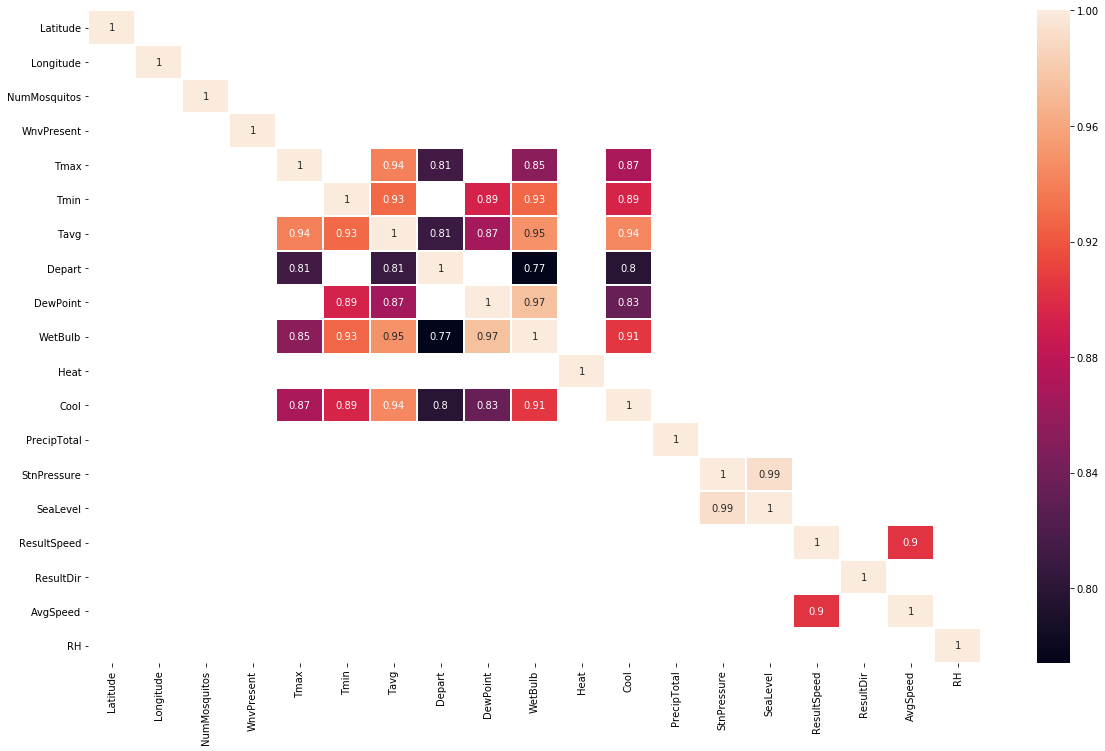

In [574]:
# Heat map of the numerical data above
plt.figure(figsize=(20, 12))
sns.heatmap(train_merge.corr()[train_merge.corr()>0.75], annot = True, linewidths = 1)
plt.show()

In [511]:
# Preprocessing of columns for the test train split
x_columns = ['NumMosquitos','Latitude','Longitude','Tavg','Heat','Depart', 'Cool', 'PrecipTotal',
       'StnPressure','RH','AvgSpeed']
species = pd.get_dummies(train_merge['Species'])
species_keep = species.columns[1:4] # keeping only the species highlighted in Random Forest feature importance

In [627]:
# combining one-hot-encoded species with x_columsn
X = pd.concat([train_merge[x_columns],species[species_keep]], axis=1)

# y = WnvPresent
y = train_merge['WnvPresent']

In [540]:
# Verifying the X columns
X.columns

Index(['NumMosquitos', 'Latitude', 'Longitude', 'Tavg', 'Heat', 'Depart',
       'Cool', 'PrecipTotal', 'StnPressure', 'RH', 'AvgSpeed', 'CULEX PIPIENS',
       'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'],
      dtype='object')

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=33,stratify=y)

In [483]:
ss = StandardScaler()
X_sc = ss.fit_transform(X_train)
X_sc_test = ss.transform(X_test)

In [484]:
lr = LogisticRegression()

In [527]:
X_sc.shape[1]

14

### Potential Features Reductions if needed.  Current features = 14

In [556]:
rfe = RFE(lr, n_features_to_select=13)
rfe = rfe.fit(X_sc, y_train)
f_reduce1 = rfe.ranking_.tolist()

In [555]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(X_sc, y_train)
f_reduce2 = rfe.ranking_.tolist()

In [554]:
rfe = RFE(lr, n_features_to_select=11)
rfe = rfe.fit(X_sc, y_train)
f_reduce3 = rfe.ranking_.tolist()

In [682]:
dic = {'1_features':X.columns, '2_thirteen':f_reduce1,'3_twelve':f_reduce2, '4_eleven':f_reduce3}
RFE = pd.DataFrame.from_dict(dic)
RFE.columns = ['features','thirteen','twelve','eleven']
RFE

,features,thirteen,twelve,eleven
0,NumMosquitos,1,1,1
1,Latitude,1,1,1
2,Longitude,1,1,1
3,Tavg,1,1,1
4,Heat,1,1,1
5,Depart,1,2,3
6,Cool,1,1,2
7,PrecipTotal,1,1,1
8,StnPressure,1,1,1
9,RH,1,1,1


In [ ]:
print(lr.predict(X_sc_test))

### Model Score

In [560]:
lr.fit(X_sc,y_train)
print('Accuracy: %0.3f'%lr.score(X_sc_test,y_test))

Accuracy: 0.948


In [562]:
# Cross_val_score is close to the original score so more confident in the models accuracy
print('Accuracy: %0.3f'%cross_val_score(lr,X_sc_test, y_test, cv=5, scoring='accuracy').mean())

Accuracy: 0.947


In [662]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_sc_test)
confusion_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])

[[   1  164]
 [   1 2986]]


In [679]:
cm = pd.DataFrame.from_dict({'wnv_act':confusion_matrix[:,0],'wnv_not_act':confusion_matrix[:,1]})

cm 

,wnv_act,wnv_not_act
0,1,164
1,1,2986


In [659]:
# Classifiv
print(classification_report(y_test, y_pred,target_names = ['wnv_not_present','wnv_present']))

                 precision    recall  f1-score   support

wnv_not_present       0.95      1.00      0.97      2987
    wnv_present       0.50      0.01      0.01       165

    avg / total       0.92      0.95      0.92      3152



### ROC_AUC

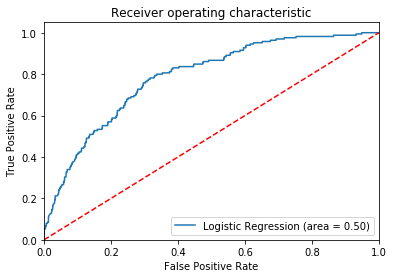

In [508]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_sc_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_sc_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()